<a href="https://colab.research.google.com/github/rcanzlovar/Jupyterdocs/blob/master/Covid_Data_Graphs-colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid Data analysis with Python

This page downloads a dataset maintained by the New York Times of daily cases and deaths by countay across the country. It generates a series of graphs for counties in a tuple. 

Important paths: 
- Create a directory on your Google Drive called 'coviddata'. We'll be making a symbolic link from the google colab environment to your google drive. almost like they were NFS mounted. 









In [36]:
# Make a directory called 'coviddata' in your Google Drive before this
# with the 'hashes' subdirectory for storing hashes
from google.colab import drive

# This will ask you to go to a link and get an authorization code
# to let the .hashcat folder get synced to your Google Drive
drive.mount('/content/drive')

# Make a symbolic link between Google Drive
# and the local /root/.covid directory
!ls /content/drive/My\ Drive/coviddata
!#ln -s /content/drive/My\ Drive/coviddata /root/.covid
savedir = '/root/.covid/'
!ls "/root/.covid/covidimage"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
covidimage
 California.png				     Colorado.png
'California_San Franciscodeathsmooth1.png'   Colorado_Welddeathsmooth1.png
'California_San Franciscodeaths.png'	     Colorado_Welddeaths.png
 Colorado_Adamsdeathsmooth1.png		     Florida.png
 Colorado_Adamsdeaths.png		     Florida_Sumterdeathsmooth1.png
 Colorado_Boulderdeathsmooth1.png	     Florida_Sumterdeaths.png
 Colorado_Boulderdeaths.png		     Michigan_Oaklanddeathsmooth1.png
 Colorado_Denverdeathsmooth1.png	     Michigan_Oaklanddeaths.png
 Colorado_Denverdeaths.png		     Michigan.png
'Colorado_El Pasodeathsmooth1.png'	     Michigan_Waynedeathsmooth1.png
'Colorado_El Pasodeaths.png'		     Michigan_Waynedeaths.png
 Colorado_Jeffersondeathsmooth1.png	     Oregon_Multnomahdeathsmooth1.png
 Colorado_Jeffersondeaths.png		     Oregon_Multnomahdeaths.png
 Colorado_Larimerdeathsmooth1.png	     Oregon.png
 Colorado

In [37]:
try:
    import pandas as pd 
except ModuleNotFoundError:
    !pip3 install pandas
    import pandas as pd 
    
import numpy as np 
    
import matplotlib as plt

from pandas import DataFrame
from functools import reduce
import datetime

! /usr/bin/python3 -m pip install --upgrade pip
!#rmdir covidimage
!if [ ! -d /root/.covid/covidimage/ ] ;  then  mkdir /root/.covid/covidimage/  ; echo "made dir"; fi 
imagedir = savedir + 'covidimage/'


Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)


In [38]:
# grab the latest data... 
! rm $SAVEDIR/us-counties.csv*
! curl --output /root/.covid/us-counties.csv 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
!ls /root/.covid

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9356k  100 9356k    0     0  18.3M      0 --:--:-- --:--:-- --:--:-- 18.3M
covidimage  us-counties.csv


In [39]:
# pull it into a matrix
covids = pd.read_csv("/root/.covid/us-counties.csv")
covids.shape

(242827, 6)

In [ ]:
# Make it searchable
df = DataFrame(covids, 
               columns = ['date', 
                          'county', 
                          'state', 
                          'cases', 
                          'deaths'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [41]:
############################
# make transformations like running average
def deltas(mydf,incolname,outcolname):
    #return mydf
    for i in range(1,mydf.shape[0]-2):
        #print (df.iloc[i,1] + " " +     df.iloc[i+1,1])
        
      
        # currently 3, change in both places below 
        mydf.loc[mydf.index[i+2],outcolname] =         mydf.iloc[i,incolname] - mydf.iloc[i-1,incolname] 
#        print (mydf.head())
#        print (list(mydf))
        
    return mydf

########################################
#for i in range(0,df.shape[0]-2):
#    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [42]:
def new_running_avg(mydf,srcname,depth,outcolumn):
    # 
    #   select_county = new_running_avg(select_county,'deaths',4,'SMA_3')
     
    # don't bump into the end of the list, so adjut by depth. 
    # at n, we take an average of the lines fropm ne to n+ depth and leaves
    # the averate at n+depth
    for i in range(0,mydf.shape[0]-(depth-1)):
        # get this and the next depth records
        df2 = df1.iloc[i:i+(depth-1)]

        #print(outcolumn,df2.head())
       
        # get the total of that column
        total = reduce(lambda x, y: x + y, df2[srcname])

        mydf.loc[mydf.index[i + (depth-1) ],outcolumn] = np.round(
             ( total / depth),1)
    return mydf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Full California
5369


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Full Oklahoma
5736


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Full Colorado
5147


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Full Florida
6042


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained un

Full Michigan
6753


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Full Oregon
2856


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


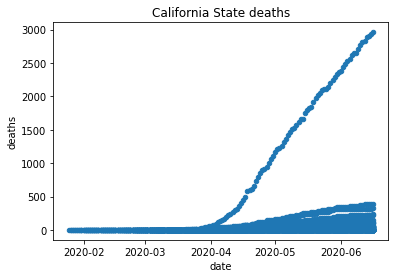

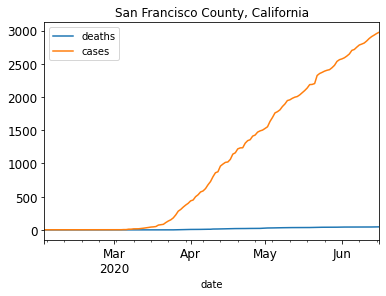

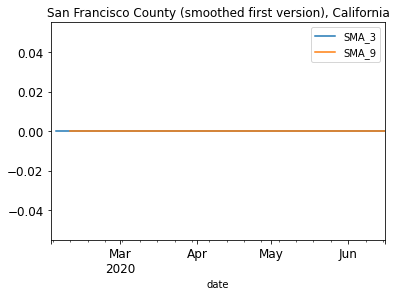

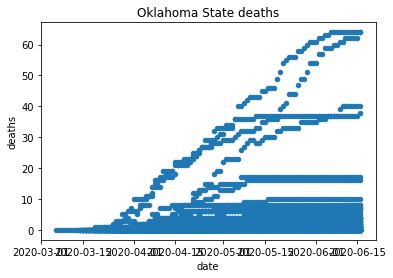

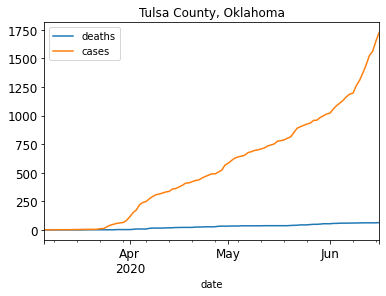

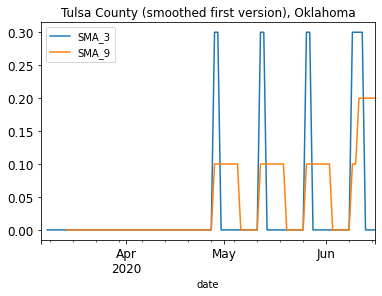

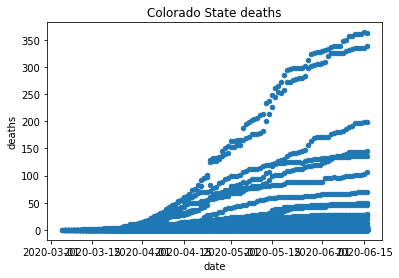

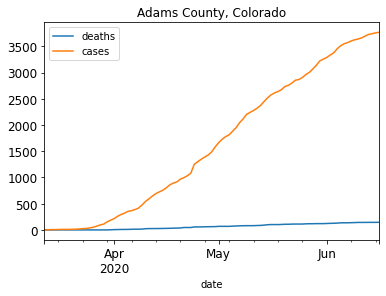

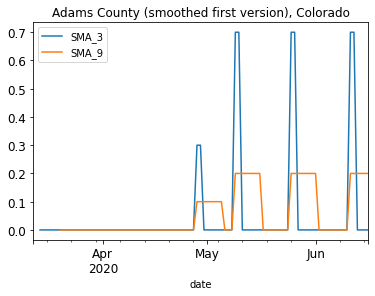

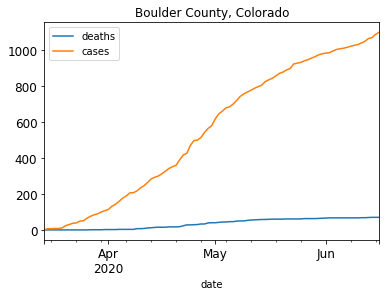

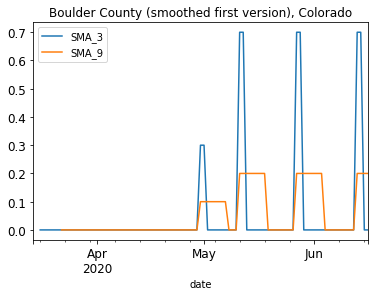

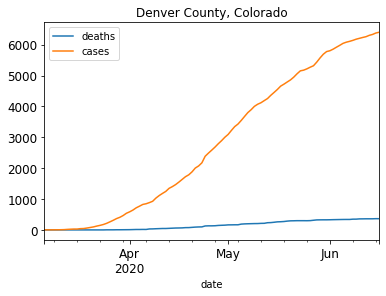

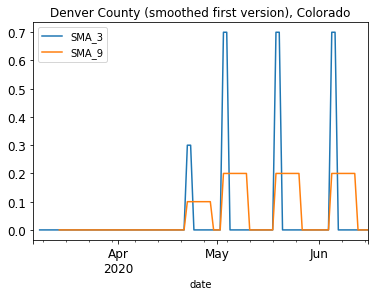

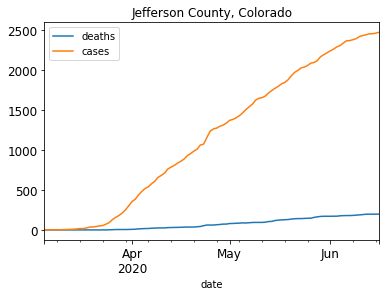

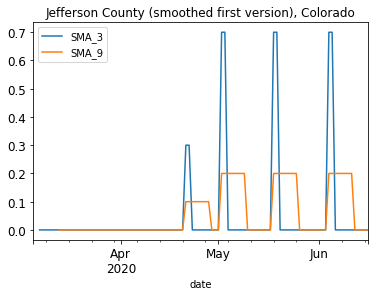

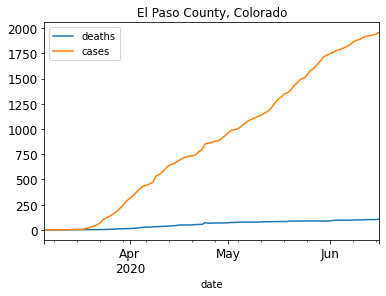

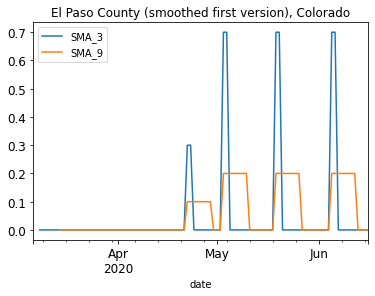

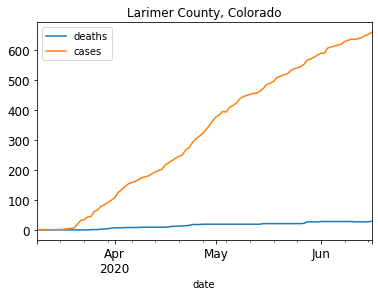

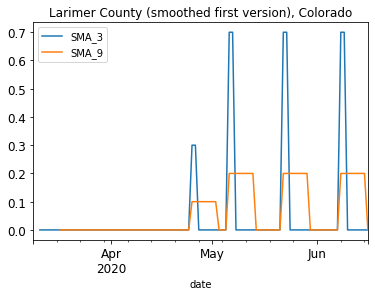

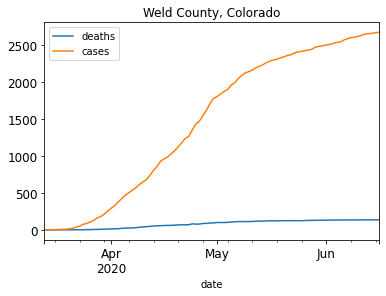

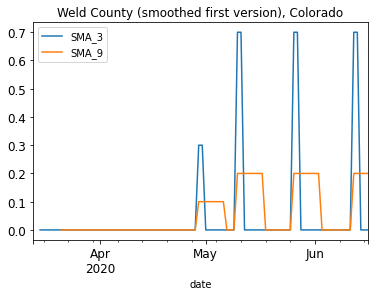

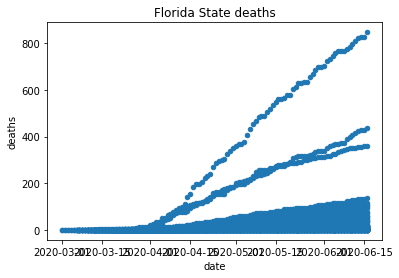

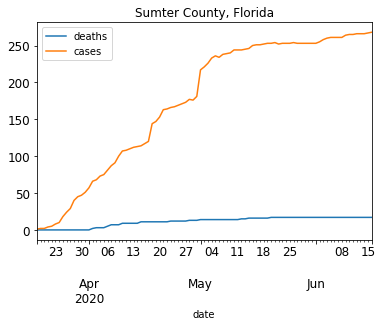

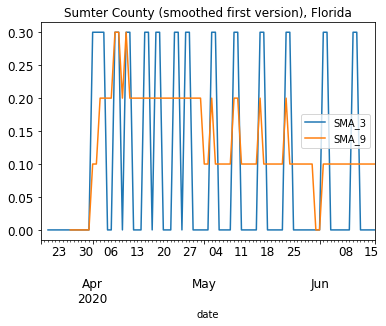

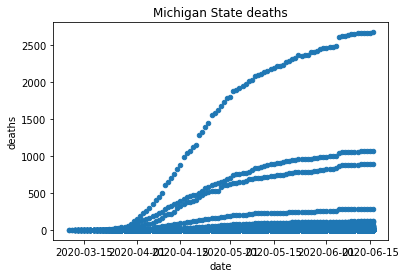

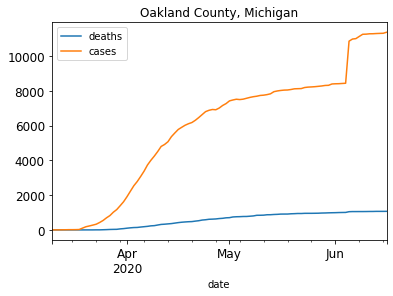

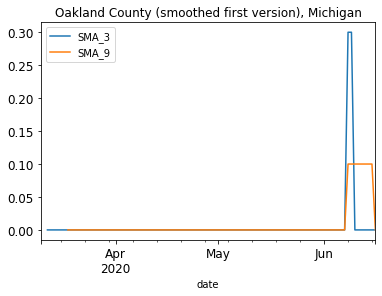

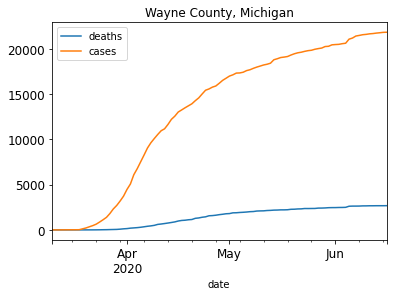

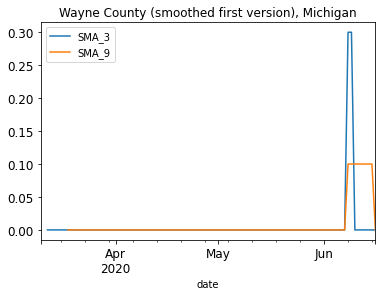

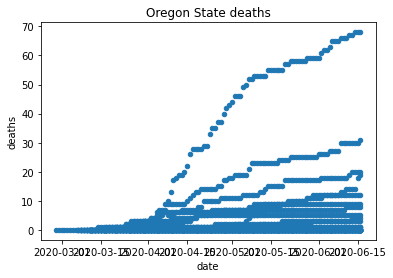

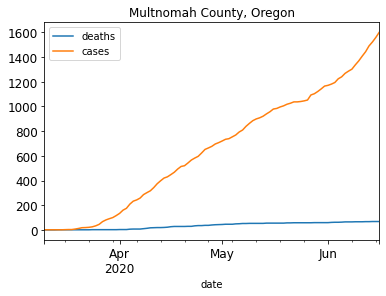

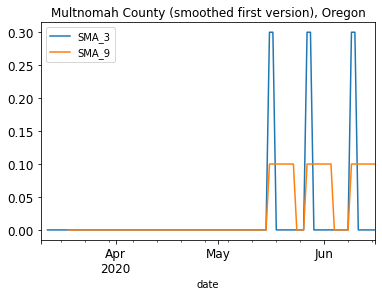

In [45]:
# added states because of ambiguous Jefferson and Wayne
counties = [
    ['San Francisco','California'],
    ['Tulsa','Oklahoma'],
    ['Adams','Colorado'],
    ['Boulder','Colorado'],
    ['Denver','Colorado'],
    ['Jefferson','Colorado'],
    ['El Paso','Colorado'],
    ['Larimer','Colorado'],
    ['Weld','Colorado'],
    ['Sumter','Florida'],
    ['Oakland','Michigan'],
    ['Wayne','Michigan'],
    ['Multnomah','Oregon']
]
count = 0
states = {}

for county, state in counties:
    #Select by state.

    df1= df.loc[df['state'] == state ]
    df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

    if (state not in states):
        print ("Full " + state)
        print (df1.shape[0])
        states[state] = 1
        count = count + 1

        fig1 = df1.plot(x='date',
            kind='scatter',
            y='deaths',
            title=state + " State deaths").get_figure()
        fig1.savefig(imagedir + state + ".png")


    # this grabs only the ones that have the county field set to the 
    # value of county variable
    select_county = df1.loc[df1['county'] == county ]
    
    select_county = new_running_avg(select_county,'deaths',3,'SMA_3')
    select_county = new_running_avg(select_county,'deaths',7,'SMA_7')
    select_county = new_running_avg(select_county,'deaths',9,'SMA_9')
 #   select_county = deltas(select_county,'deaths','deathdelta')
 #   select_county = deltas(select_county,'cases','casesdelta')

#    print("new1",select_county.head())

#    print("new2\n",select_county.head())

    fig2 = select_county.plot(x='date',
                       y=['deaths','cases'],
                       fontsize=12,
                       title=county + " County, " + state).get_figure()
    fig2.savefig(imagedir + state + "_" + county + "deaths" + ".png")
    
    fig3 = select_county.plot(x='date',
                       y=['SMA_3','SMA_9'],
                       fontsize=12,
                       title=county + " County (smoothed first version), " + state).get_figure()
    fig3.savefig(imagedir + state + "_" + county + "deathsmooth1" + ".png")

In [44]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi

!nvidia-smi
!pip3 install commands
import commands
print(commands.getoutput('nvidia-smi'))

Thu Jun 18 06:32:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

ModuleNotFoundError: ignored